Часть 2 - анализ текстовых данных
Провести аналитику текстовых данных.

Токенезировать и лемматизировать полученные текстовые данные полученные из 1 части задания
Токенизация - разделение слов на предложения
Лемматизация - перевод слов в начальную форму
Посчитать наиболее встречающиеся пары подлежащих и сказуемых
Посчитать самые популлярные слова (исключая стоп-слова, словарь стоп слов можно найти в nltk, либо отбросить по частям речи)
Вывести статистику (по убыванию, наиболее встречающеся пары и самые популярные слова за исключением стоп-слов)

In [1]:
# Импорты
!pip install natasha
!pip install nltk
!pip install matplotlib
!pip install seaborn
!pip install setuptools
import sqlite3
import natasha
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
nltk.download('stopwords')

You should consider upgrading via the 'C:\Python3.9.7\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python3.9.7\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python3.9.7\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python3.9.7\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python3.9.7\python.exe -m pip install --upgrade pip' command.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
conn = sqlite3.connect('articles.db')
CURSOS = conn.cursor()
CURSOS.execute('''SELECT title FROM articles LIMIT 20''')
titles = CURSOS.fetchall()
CURSOS.execute('''SELECT body FROM articles LIMIT 20''')
texts = CURSOS.fetchall()

In [3]:
data = dict(zip(titles, texts)) # p.s. здесь вы открываете полученные данные

# Для примера можно использовать natasha
# !pip install natasha
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

In [4]:
from ipymarkup import show_dep_ascii_markup as show_markup

articles = list(data.values())

# Проверяем, не пуст ли список статей
if not articles:
    raise ValueError("Список статей пуст")

# Находим статью с максимальной длиной
article = max(articles, key=lambda x: len(x))

doc = Doc(str(article))
doc.segment(segmenter)
doc.parse_syntax(syntax_parser)
doc.tag_morph(morph_tagger)

# Выводим синтаксический анализ предложений
for sentence in doc.sents:
    sentence.syntax.print()


  ┌──► (     punct
  │ ┌► '     punct
┌─└─└─ Игорь 
│ └──► Додон flat:name
└────► .     punct
  ┌──────────────────────► Фото          ccomp
  │                     ┌► :             punct
  │ ┌─┌───────────┌─┌─┌─└─ Vladislav     
  │ │ │           │ │ └──► Culiomza      flat:foreign
  │ │ │           │ │   ┌► /             punct
  │ │ │ ┌─────────│ └►┌─└─ Reuters       flat:foreign
  │ │ │ │         │ │ └──► \             punct
  │ │ │ │         │ └────► n             appos
  │ │ │ │         └──────► Разлад        appos
  │ │ │ │               ┌► в             case
┌►│ │ │ │             ┌─└─ отношениях    nmod
│ │ │ │ │             │ ┌► между         case
│ │ │ │ │           ┌─└►└─ Молдавией     nmod
│ │ │ │ │           │   ┌► и             cc
│ │ │ │ │           └──►└─ Россией       conj
│ │ │ │ │ ┌─┌─┌►┌─────┌─── произошел     ccomp
│ │ │ │ │ │ │ │ │     │ ┌► по            case
│ │ │ │ │ │ │ │ │     └►└─ вине          obl
│ │ │ │ │ │ │ │ │   ┌─└──► выходцев      nmod
│ │ │ │ │ │ │ │ 

In [5]:
# Токенизация
for sentence in doc.sents:
  for token in sentence.tokens:
    print(token)

# Лемминизация
for sentence in doc.sents:
  for token in sentence.tokens:
    token.lemmatize(morph_vocab)
  lemmas = {_.text: _.lemma for _ in sentence.tokens}
  print(lemmas.items())

DocToken(stop=1, text='(', id='1_1', head_id='1_3', rel='punct', pos='PUNCT')
DocToken(start=1, stop=2, text="'", id='1_2', head_id='1_3', rel='punct', pos='PUNCT')
DocToken(start=2, stop=7, text='Игорь', id='1_3', head_id='1_3', rel='parataxis', pos='PROPN', feats=<Anim,Nom,Masc,Sing>)
DocToken(start=8, stop=13, text='Додон', id='1_4', head_id='1_3', rel='flat:name', pos='PROPN', feats=<Anim,Nom,Masc,Sing>)
DocToken(start=13, stop=14, text='.', id='1_5', head_id='1_3', rel='punct', pos='PUNCT')
DocToken(start=16, stop=20, text='Фото', id='2_1', head_id='2_44', rel='ccomp', pos='NOUN', feats=<Inan,Nom,Neut,Sing>)
DocToken(start=20, stop=21, text=':', id='2_2', head_id='2_3', rel='punct', pos='PUNCT')
DocToken(start=22, stop=31, text='Vladislav', id='2_3', head_id='2_1', rel='appos', pos='X', feats=<Yes>)
DocToken(start=32, stop=40, text='Culiomza', id='2_4', head_id='2_3', rel='flat:foreign', pos='X', feats=<Yes>)
DocToken(start=41, stop=42, text='/', id='2_5', head_id='2_6', rel='punc

In [6]:
# Записываем в словарь подлежащее : сказуемое
pairs = {}
for sentence in doc.sents:
    nsubj = root = ''
    for token in sentence.tokens:
        token.lemmatize(morph_vocab)
        if token.rel in {"nsubj", "root"}:
            if token.rel == "nsubj":
                nsubj = token.lemma
            elif token.rel == "root":
                root = token.lemma
            if nsubj and root:
                pairs[nsubj] = root

all_pairs = []
for article in articles:
  doc = Doc(str(article))
  doc.segment(segmenter)
  doc.parse_syntax(syntax_parser)
  doc.tag_morph(morph_tagger)
  for sentence in doc.sents:
    nsubj = root = ''
    for token in sentence.tokens:
      token.lemmatize(morph_vocab)
      if token.rel == "nsubj":
        nsubj = token.lemma
      if token.rel == 'root':
        root = token.lemma
      if nsubj and root:
        all_pairs.append((nsubj, root))

print(all_pairs)
all_pairs_count = Counter(all_pairs)
all_pairs_count.most_common(20)

[('экс-президент', 'заявить'), ('экс-президент', 'заявить'), ('экс-президент', 'заявить'), ('экс-президент', 'заявить'), ('экс-президент', 'заявить'), ('экс-президент', 'заявить'), ('экс-президент', 'заявить'), ('экс-президент', 'заявить'), ('экс-президент', 'заявить'), ('экс-президент', 'заявить'), ('экс-президент', 'заявить'), ('экс-президент', 'заявить'), ('экс-президент', 'отметить'), ('экс-президент', 'отметить'), ('экс-президент', 'отметить'), ('экс-президент', 'отметить'), ('экс-президент', 'отметить'), ('экс-президент', 'отметить'), ('экс-президент', 'отметить'), ('экс-президент', 'отметить'), ('экс-президент', 'отметить'), ('экс-президент', 'отметить'), ('экс-президент', 'отметить'), ('экс-президент', 'отметить'), ('экс-президент', 'отметить'), ('экс-президент', 'отметить'), ('экс-президент', 'отметить'), ('экс-президент', 'отметить'), ('экс-президент', 'отметить'), ('додон', 'обвинить'), ('додон', 'обвинить'), ('додон', 'обвинить'), ('додон', 'обвинить'), ('додон', 'обвинить'

[(('он', 'выразить'), 53),
 (('он', 'отметить'), 49),
 (('который', 'пытаться'), 49),
 (('шольц', 'указать'), 47),
 (('пятеро', 'заявить'), 37),
 (('он', 'заключить'), 36),
 (('украина', 'призвать'), 36),
 (('пользователь', 'неизвестный'), 35),
 (('зеленский', 'подлый'), 34),
 (('кто', 'заявлять'), 33),
 (('он', 'призвать'), 32),
 (('президент', 'рассматривать'), 29),
 (('немец', 'добавить'), 29),
 (('мацегор', 'обращаться'), 29),
 (('он', 'указать'), 28),
 (('руководитель', 'подчеркнуть'), 28),
 (('президент', 'заявить'), 27),
 (('публикация', 'стать'), 26),
 (('m', 'поразить'), 26),
 (('мы', 'заявить'), 26)]

In [7]:
# Наиболее частовстречающиеся слова, исключая стоп слова, знаки пунктуации и числа, а также англ. n (знак переноса строки)
import string
filtered = []
punctuation = set(string.punctuation + '«»—' + string.digits + 'n')
stop_words = set(stopwords.words('russian'))
for article in articles:
  doc = Doc(str(article))
  doc.segment(segmenter)
  doc.parse_syntax(syntax_parser)
  doc.tag_morph(morph_tagger)
  for sentence in doc.sents:
    for token in sentence.tokens:
      token.lemmatize(morph_vocab)
      if token.lemma not in punctuation and token.lemma not in stop_words:
        filtered.append(token.lemma)

filtered_count = Counter(filtered)
filtered_count.most_common(20)

[('украина', 52),
 ('россия', 49),
 ('это', 45),
 ('который', 30),
 ('слово', 29),
 ('фото', 27),
 ('заявить', 24),
 ('свой', 20),
 ('удар', 20),
 ('российский', 20),
 ('также', 18),
 ('год', 17),
 ('президент', 17),
 ('область', 17),
 ('военный', 17),
 ('оружие', 15),
 ('человек', 15),
 ('июнь', 15),
 ('страна', 14),
 ('шольц', 14)]

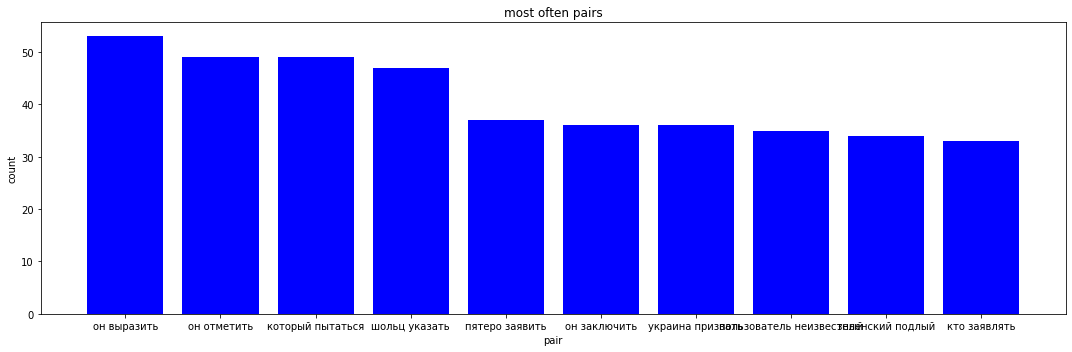

In [8]:
pairs = [pair[0][0] + ' ' + pair[0][1] for pair in all_pairs_count.most_common(10)]
count = [pair[1] for pair in all_pairs_count.most_common(10)]

plt.figure(figsize=(15, 5))
plt.bar(pairs, count, color = 'blue')
plt.title("most often pairs")
plt.ylabel("count")
plt.xlabel("pair")
plt.tight_layout()
plt.show()

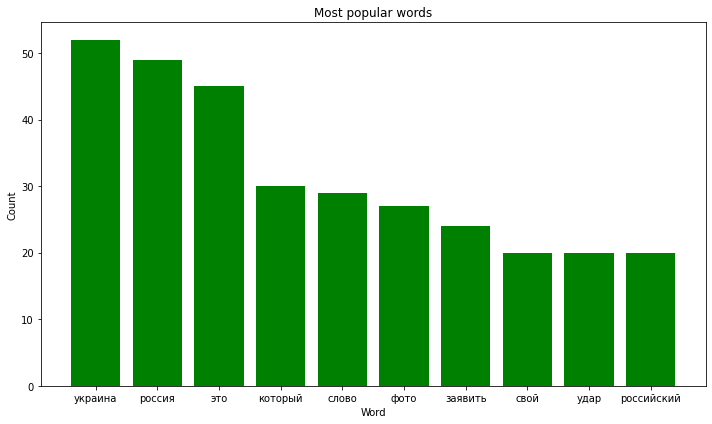

In [9]:
words = [pair[0] for pair in filtered_count.most_common(10)]
count = [pair[1] for pair in filtered_count.most_common(10)]

plt.figure(figsize=(10, 6))
plt.bar(words, count, color = 'green')
plt.title("Most popular words")
plt.ylabel("Count")
plt.xlabel("Word")
plt.tight_layout()
plt.show()